In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data/Emotion_final.csv') #import du dataset

1. Bag of words

    Preprocessing

In [40]:
X = df.Text     #Feature
y = df.Emotion  #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Division données de test et d'entraînement

In [25]:
bow_pipeline = make_pipeline(
    CountVectorizer(),                              # Vectorizer 
    LogisticRegression(max_iter=2000, tol=0.0001)   # Classifier 
)

    Entraînement

In [14]:
bow_pipeline.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [15]:
bow_predictions = bow_pipeline.predict(X_test)

    Score

In [30]:
accuracy_score(y_test, bow_predictions)

0.8939888164026095

In [35]:
pred_text = "it's a beautiful day, today"
bow_pipeline.predict([pred_text.split()])

NotFittedError: Vocabulary not fitted or provided

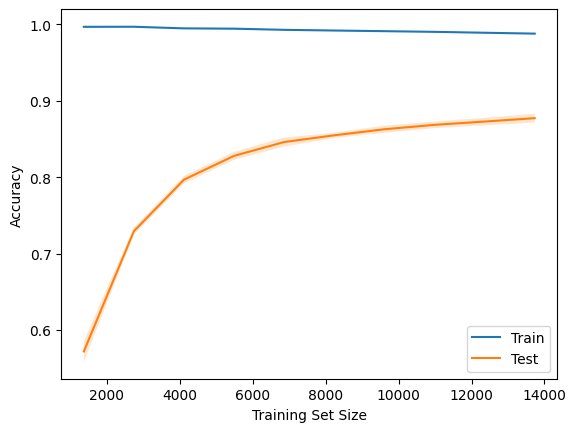

In [24]:
# from sklearn.model_selection import learning_curve
# import numpy as np
# import matplotlib.pyplot as plt
# # Définir votre modèle et vos données d'entraînement X_train, y_train

# train_sizes, train_scores, test_scores = learning_curve(estimator=bow_pipeline.named_steps['logisticregression'], X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# # Calculer les moyennes et les écarts-types des scores d'entraînement et de test
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Tracer la courbe d'apprentissage
# plt.plot(train_sizes, train_mean, label='Train')
# plt.plot(train_sizes, test_mean, label='Test')
# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.xlabel('Training Set Size')
# plt.ylabel('Accuracy')
# plt.legend(loc='best')
# plt.show()
